# 主成分分析(PCA)

## PCA from scrach

In [49]:
import numpy as np
import pandas as pd

In [50]:
np.random.seed(0)
x = np.random.randint(1, 10, size = 10)
y = np.random.randint(1, 20, size = 10)

In [51]:
# 標準化
x_mean = np.mean(x)
x_std = np.std(x)
x_scaled = (x-x_mean)/x_std
y_mean = np.mean(y)
y_std = np.std(y)
y_scaled = (y-y_mean)/y_std

data = np.array([x_scaled, y_scaled]).T
# 分散共分散行列
cov_matrix = np.cov(data, rowvar = False)
# 固有値、固有ベクトル
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# 固有値を降順にソート
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# 新しい次元数を選択
new_dimension = 1
# 最も重要な固有ベクトルを選択
selected_eigenvectors = eigenvectors[:, :new_dimension]

# データを新しい次元に射影
projected_data = np.dot(selected_eigenvectors.T, data.T).T

# 結果を表示
print("新しい次元削減されたデータ:")
print(projected_data)

新しい次元削減されたデータ:
[[ 0.81583841]
 [-1.80210848]
 [ 0.89219553]
 [ 0.13304967]
 [ 1.34679798]
 [-1.08158372]
 [-0.85428249]
 [-0.05651553]
 [-0.58836017]
 [ 1.19496881]]


＜動画内答え＞

In [52]:
# サンプルデータ準備
x = np.array([3,4,2,3,4,4,3])
y = np.array([2,3,5,5,3,2,3])
X = pd.DataFrame({'x':x, 'y':y})
X

,x,y
0,3,2
1,4,3
2,2,5
3,3,5
4,4,3
5,4,2
6,3,3


In [53]:
def my_pca(X, num_components):
    # step1. 標準化
    X_scaled = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)
    
    # step2. 分散共分散行列
    cov_mat = np.cov(X_scaled, rowvar = False)
    
    # step3. 固有ベクトルと固有値
    # np.linalg.eigh()の返り値の固有値と固有ベクトルは列で対応している。(1つ目の固有値と1列目の固有ベクトルが対応)
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    
    # step4. 固有値を大きい順に並び替え、そのインデックス順に固有ベクトルも並び替える
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_evalues = eigen_values[sorted_index]
    sorted_evectors = eigen_vectors[:, sorted_index]
    subset_evectors = sorted_evectors[:, :num_components]
    
    # step5. データ変換
    X_reduced = np.dot(X_scaled, subset_evectors)
    
    return X_reduced

In [54]:
my_pca(X, 1)

array([[-0.49467432],
       [-0.89576549],
       [ 2.34350404],
       [ 1.33314107],
       [-0.89576549],
       [-1.50503729],
       [ 0.11459748]])

## PCA from sklearn

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components = 1)
pca.fit_transform(X)

array([[-0.49467432],
       [-0.89576549],
       [ 2.34350404],
       [ 1.33314107],
       [-0.89576549],
       [-1.50503729],
       [ 0.11459748]])

In [57]:
# データ準備
import seaborn as sns
df = sns.load_dataset('iris')
y_col = 'species'
X = df.loc[:, df.columns != y_col]
y = df[y_col].values
# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# PCA
pca = PCA(n_components = 2)
X_pc = pca.fit_transform(X_scaled)

<AxesSubplot:xlabel='first_component', ylabel='second_component'>

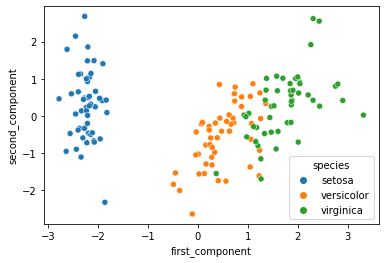

In [58]:
y = y.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X_pc, y], axis = 1), columns = ['first_component', 'second_component', 'species'])
sns.scatterplot(x = 'first_component', y = 'second_component', data = df_pc, hue = 'species')

## 寄与率と累積寄与率

In [61]:
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X_scaled)
X_pca_ex = pca.explained_variance_ratio_

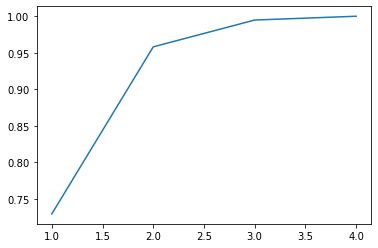

In [65]:
df_pca = pd.DataFrame({"pca_ex":X_pca_ex})
df_pca["累積寄与率"] = df_pca["pca_ex"].cumsum()
components = [n+1 for n in range(4)]

import matplotlib.pyplot as plt
plt.plot(components, df_pca["累積寄与率"])

＜チャレンジ＞

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from PIL import Image
from sklearn.model_selection import train_test_split

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [8]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


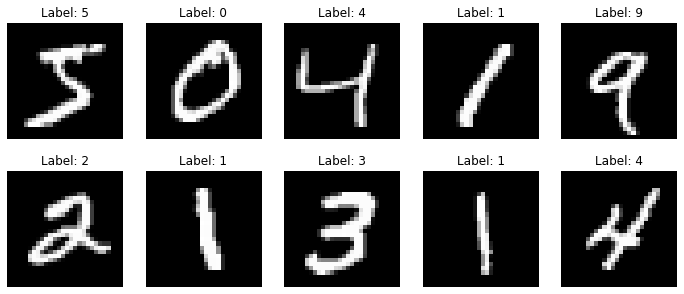

In [15]:
images = mnist.data.to_numpy()
labels = mnist.target.to_numpy()

# 画像を表示
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')


In [26]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.3, random_state = 0)

In [ ]:
# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# PCA
pca = PCA(n_components = 0.95)
pca.fit(X_train_scaled)

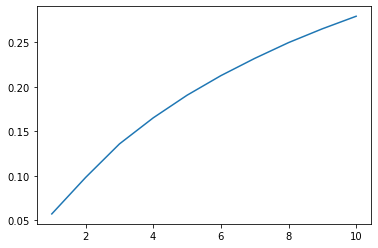

In [31]:
X_train_pca = pca.transform(X_train_scaled)
X_pca_ex = pca.explained_variance_ratio_
cumsum_pca_ex = np.cumsum(X_pca_ex)
plt.plot(range(len(cumsum_pca_ex) + 1), cumsum_pca_ex)

In [ ]:
# テストデータも標準化・PCAを実行
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# モデル学習
model = LogisticRegression()
model.fit(X_train_pca)
# 予測
y_pred = model.predict(X_test_pca)